In [1]:
%display latex
var('r c t');y = function('y')(t)
de = y + r*c*diff(y,t) == 0
des = desolve(de,[y,t],[0,1]);show(des)

e^(-t/(c*r))

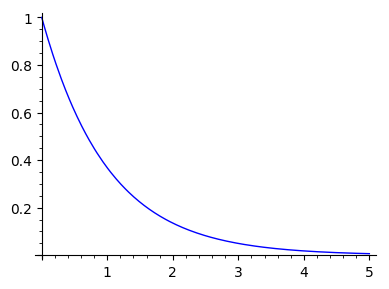

In [2]:
f(t,r,c) = des
plot(f(t,1,1),(t,0,5),figsize=(4,3))

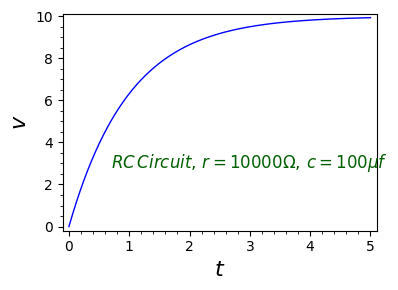

In [3]:
f(t,a,b,r,c) = (a-b) * des + b
lbl = text("$RC \, Circuit, \,r = 10000\Omega, \, c = 100\mu f $",(3,3),
           fontsize=12,rgbcolor='#006000')
p = plot(f(t,0,10,10000,100e-6),(t,0,5), figsize=(4,3),axes_labels=['$t$','$v$'])
show(p+lbl,frame=True,axes=False)

In [4]:
var('a b r c c_t x y z t q k1 k2 k_1 k_2 omega')

y = function('y')(t)
de = y + r*c_t*diff(y,t) == sin(omega * t)
des = desolve(de,[y,t]);des

(_C - (omega*cos(omega*t) - sin(omega*t)/(c_t*r))*e^(t/(c_t*r))/((omega^2 + 1/(c_t^2*r^2))*c_t*r))*e^(-t/(c_t*r))

In [5]:
des2 = (des.substitute(omega == 1)).full_simplify()
df(r,c_t,omega,t) = des2

(_C*c_t^2*r^2 - c_t*r*cos(t)*e^(t/(c_t*r)) + e^(t/(c_t*r))*sin(t) + _C)*e^(-t/(c_t*r))/(c_t^2*r^2 + 1)

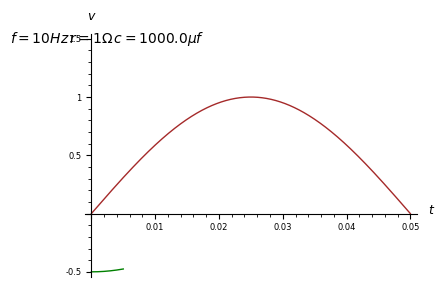

In [6]:
var("t")
r = 1;c = 0.001;f = 10;omega = 2*pi*f
pa = plot(sin(omega*t),(t,0,0.05),
          rgbcolor=('brown'),axes_labels=['$t$','$v$'])
pb = plot(-1/2*cos(omega*t),(t,0,.005),
        rgbcolor=('green'),axes_labels=['$t$','$v$'])
#pb = plot(df(r,c,omega*t),(t,-0.5,.005),rgbcolor=('#008000'))
lbl = text("$f = %.0f Hz \,r = %.0f \Omega \, c = %.1f {\mu}f$"
 % (f,r,c*1e6),(.0025,1.5),fontsize=10,rgbcolor='black')
show(pa+lbl+pb,figsize=(4,3),fontsize=6,frame=False)

In [1]:
var('t') 
uv_wsp = [('phi',r'\varphi')] 
xy_wsp = [('x','x')] 
for v,lv in uv_wsp+xy_wsp:
    var("%s"%v,latex_name=r'%s'%lv) 
    vars()[v.capitalize()] = function(v.capitalize())(t)
    var("%sdd"%v,latex_name=r'\ddot %s'%lv) 
    var("%sd"%v,latex_name=r'\dot %s'%lv) 
    var("d%s"%v,latex_name=r'\delta %s'%lv) 
    uv = [vars()[v] for v,lv in uv_wsp] 
to_fun=dict() 
for v,lv in uv_wsp+xy_wsp: 
    to_fun[vars()[v]]=vars()[v.capitalize()] 
    to_fun[vars()[v+"d"]]=vars()[v.capitalize()].diff() 
    to_fun[vars()[v+"dd"]]=vars()[v.capitalize()].diff(2) 
rlc = dict((v,k) for k,v in to_fun.items()) 
show(rlc)

{diff(Phi(t), t, t): phidd,
 diff(Phi(t), t): phid,
 diff(X(t), t, t): xdd,
 Phi(t): phi,
 diff(X(t), t): xd,
 X(t): x}

In [49]:
var('omega0') 
assume(omega0>0) 
osc=xdd == -omega0*x*10
osc.show() 
fi= desolve(osc.subs(to_fun),
    dvar=X,ivar=t,show_method=False) 
var('v0 x0') 
#fi = desolve(osc.substitute(to_fun),dvar=X,ivar=t,ics=[0,x0,0])
fi = desolve(osc.subs(to_fun),dvar=X,ivar=t,ics=[0,0,1])

xdd == -10*omega0*x

In [56]:
pf=plot(fi.subs(omega0==1),(t,0,6.28),
     figsize=4,color='blue')

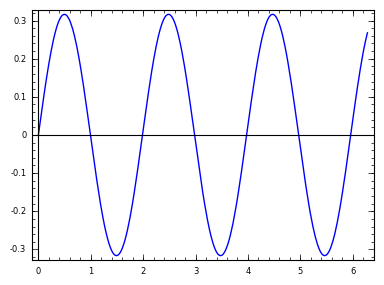

In [57]:
show(pf,figsize=(4,3),fontsize=6,frame=True)